In [ ]:
from nltk.corpus.reader.timit import import_from_stdlib
import pandas as pd
import numpy as np
import tensorflow as tf
import  re  
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,LSTM
import matplotlib.pyplot as plt
import pickle



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving master_data.csv to master_data.csv


In [ ]:
df = pd.read_csv('/content/master_data.csv')
df.head()

,Unnamed: 0,text,category
0,0,Very oily and creamy. Not at all what I expect...,0
1,1,This palette was a decent price and I was look...,0
2,2,The texture of this concealer pallet is fantas...,0
3,3,I really can't tell what exactly this thing is...,0
4,4,"It was a little smaller than I expected, but t...",0


In [ ]:
df['text'] = df['text'].astype('string')

In [ ]:
df.dtypes

Unnamed: 0     int64
text          string
category       int64
dtype: object

In [ ]:
#Cleaning text data

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop = stopwords.words('english')

In [ ]:
def text_cleaner(text):
    text = text.lower()
    text = re.sub('http\S+',' ',text,flags = re.MULTILINE)
    text = re.sub("[^a-z]"," ",text)
    text = re.sub('\.+',' ',text,flags = re.MULTILINE)
    words = text.split()
    imp_words = [w for w in words if w  not in stop]
    
    return " ".join(imp_words)

In [ ]:
df['cleaned_text'] = df['text'].apply(lambda x : text_cleaner(x))

In [ ]:
x = df['cleaned_text']
y = df['category']


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=3)


In [ ]:
tok = Tokenizer(oov_token='<UNK>')

In [ ]:
tok.fit_on_texts(x_train)

In [ ]:
len(tok.word_index)

100589

In [ ]:
x_train = tok.texts_to_sequences(x_train)
x_test = tok.texts_to_sequences(x_test)

In [ ]:
np.mean(df['cleaned_text'].apply( lambda x : len(x.split())))

52.22698

In [ ]:

x_train = pad_sequences(x_train,maxlen = 80,padding = 'pre',truncating = 'pre',value = 0.0)
x_test = pad_sequences(x_test,maxlen = 80,padding = 'pre',truncating = 'pre',value = 0.0)

Model Building

In [ ]:
model = Sequential([Embedding(len(tok.word_index ) +1,300),
                    LSTM(256),
                    Dense(50,activation = 'relu'),
                    Dense(5,activation = 'softmax')])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 300)         30177000  
                                                                 
 lstm (LSTM)                 (None, 256)               570368    
                                                                 
 dense (Dense)               (None, 50)                12850     
                                                                 
 dense_1 (Dense)             (None, 5)                 255       
                                                                 
Total params: 30,760,473
Trainable params: 30,760,473
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='Adam',loss='SparseCategoricalCrossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(x_train,y_train,epochs=5,batch_size=500,validation_data=[x_test,y_test])

Epoch 1/5
350/350 [==============================] - 1122s 3s/step - loss: 0.3908 - accuracy: 0.8705 - val_loss: 0.1528 - val_accuracy: 0.9520
Epoch 2/5
350/350 [==============================] - 1129s 3s/step - loss: 0.0986 - accuracy: 0.9695 - val_loss: 0.1529 - val_accuracy: 0.9518
Epoch 3/5
350/350 [==============================] - 1128s 3s/step - loss: 0.0660 - accuracy: 0.9796 - val_loss: 0.1575 - val_accuracy: 0.9523
Epoch 4/5
350/350 [==============================] - 1150s 3s/step - loss: 0.0510 - accuracy: 0.9843 - val_loss: 0.1896 - val_accuracy: 0.9480
Epoch 5/5
350/350 [==============================] - 1167s 3s/step - loss: 0.0428 - accuracy: 0.9863 - val_loss: 0.1856 - val_accuracy: 0.9504


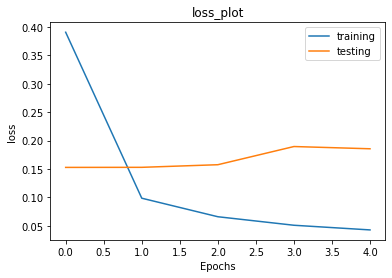

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title('loss_plot')
plt.legend(['training','testing'])

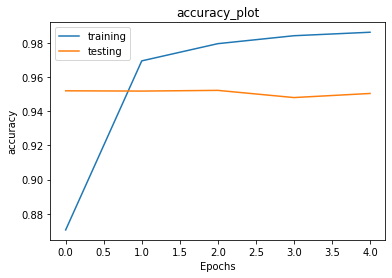

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.title('accuracy_plot')
plt.legend(['training','testing'])

Saving the model

In [ ]:
model.save('LSTM_model.h5')

In [ ]:
with open('tokinization.pickle', 'wb') as handle:
    pickle.dump(tok, handle, protocol=pickle.HIGHEST_PROTOCOL)